In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
from datetime import date
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import svm, datasets
%matplotlib inline

In [83]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
df = pd.read_csv('/content/gdrive/My Drive/Research/AWS/modify_date_general_purpose.csv')
df = df.loc[df.Instance_Family == "General purpose"]
df.head()

Mounted at /content/gdrive


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,3,9,12,14,15,17,19,20,21,23) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,EffectiveDates,PricePerUnit,Project_Type,Project_Size,LeaseContractLength,PurchaseOption,Unnamed: 6,OfferingClass,Location,Instance_Type,Current_Generation,Unnamed: 11,Instance_Family,vCPU,Clock_Speed,Memory,Storage,Network_Performance,Operating_System,Tenancy,usageType,Dedicated EBS Throughput,Normalization Size Factor,Processor Features
0,4/30/2017,0.01,NaN,medium,1,No Upfront,NaN,standard,US East (Ohio),m4.xlarge,Yes,NaN,General purpose,4.0,2.4 GHz,16,EBS,High,RHEL,Dedicated,USE2-DedicatedUsage:m4.xlarge,750 Mbps,8.0,Intel AVX; Intel AVX2; Intel Turbo
1,3/31/2018,0.01,NaN,medium,3,Partial Upfront,NaN,convertible,US East (N. Virginia),m4.large,Yes,NaN,General purpose,2.0,2.4 GHz,8,EBS,Moderate,Linux,Dedicated,DedicatedUsage:m4.large,450 Mbps,4.0,Intel AVX; Intel AVX2; Intel Turbo
4,7/1/2019,0.01,NaN,medium,3,All Upfront,NaN,standard,US West (N. California),m3.xlarge,No,NaN,General purpose,4.0,2.5 GHz,15,SSD,High,RHEL,Shared,USW1-BoxUsage:m3.xlarge,NaN,8.0,Intel AVX; Intel Turbo
5,3/1/2019,0.01,NaN,medium,3,All Upfront,NaN,convertible,US East (N. Virginia),m5ad.2xlarge,Yes,NaN,General purpose,8.0,2.5 GHz,32,SSD,Up to 10,Windows,Shared,BoxUsage:m5ad.2xlarge,Upto 2120 Mbps,16.0,"AVX, AVX2, AMD Turbo"
8,10/1/2018,0.01,NaN,medium,1,AllUpfront,NaN,standard,US West (Oregon),a1,Yes,NaN,General purpose,16.0,2.3 GHz,NaN,EBS,NaN,Linux,Reserved,USW2-ReservedHostUsage:a1,NaN,NaN,NaN


In [100]:
df["Memory"] = df["Memory"].astype("float64")
df["EffectiveDates"] = df["EffectiveDates"].astype("datetime64")
df["Project_Type"] = df["Project_Type"].astype(str)
# df["Storage"] = df["Storage"].astype(str)
df["Processor_Archi"] = df["Storage"].astype(str)
df["Clock_Speed"] = df["Clock_Speed"].astype(str)
df["PricePerUnit"] = df["PricePerUnit"].astype(float)
df['Year'] = pd.DatetimeIndex(df['EffectiveDates']).year.astype("int32")
df['Month'] = pd.DatetimeIndex(df['EffectiveDates']).month
# columns = ['PricePerUnit', 'UpfrontCost', 'Instance_Type', 'Operating_System', 'Location', 'LeaseContractLength', 'PurchaseOption', 'OfferingClass', 'Year', 'Month']
columns = ['PricePerUnit', 'UpfrontCost', 'Instance_Type', 'Operating_System', 'Location', 'LeaseContractLength', 'PurchaseOption', 'OfferingClass']
df1 = df.reindex(columns=columns)
df1 = df1[columns]
df1.head()

,PricePerUnit,UpfrontCost,Instance_Type,Operating_System,Location,LeaseContractLength,PurchaseOption,OfferingClass
0,0.01,NaN,m4.xlarge,RHEL,US East (Ohio),1,No Upfront,standard
1,0.01,NaN,m4.large,Linux,US East (N. Virginia),3,Partial Upfront,convertible
4,0.01,NaN,m3.xlarge,RHEL,US West (N. California),3,All Upfront,standard
5,0.01,NaN,m5ad.2xlarge,Windows,US East (N. Virginia),3,All Upfront,convertible
8,0.01,NaN,a1,Linux,US West (Oregon),1,AllUpfront,standard


In [ ]:
# series = df1.isnull().sum().sort_values(ascending=False)
# for index, value in series.items() :
#     if value > (df1.shape[0] > 0) :
#         print(str(index) + " : " + str(value))

In [86]:
df1.isnull().sum()

PricePerUnit                0
UpfrontCost            253654
Instance_Type               0
Operating_System            0
Location                    0
LeaseContractLength         0
PurchaseOption              0
OfferingClass               0
dtype: int64

In [101]:
def setOnDemandPrice (row):
    if (row['Instance_Type'] == 'a1.medium') :
      return 0.0255
    if (row['Instance_Type'] == 'a1.large') :
      return 0.051
    if (row['Instance_Type'] == 'a1.xlarge') :
      return 0.102
    if (row['Instance_Type'] == 'a1.2xlarge') :
      return 0.204  
    if (row['Instance_Type'] == 'a1.4xlarge') :
      return 0.408
    if (row['Instance_Type'] == 'a1.metal') :
      return 0.408  
    if (row['Instance_Type'] == 't4g.nano') :
      return 0.0042  
    if (row['Instance_Type'] == 't4g.micro') :
      return 0.0084         
    if (row['Instance_Type'] == 't4g.small') :
      return 0.0168
    if (row['Instance_Type'] == 't4g.medium') :
      return 0.0336        
    if (row['Instance_Type'] == 't4g.large') :
      return 0.0672 
    if (row['Instance_Type'] == 't4g.xlarge') :
      return 0.1344       
    if (row['Instance_Type'] == 't4g.2xlarge') :
      return 0.2688  

    if (row['Instance_Type'] == 't3.nano') :
      return 0.0052  
    if (row['Instance_Type'] == 't3.micro') :
      return 0.0104         
    if (row['Instance_Type'] == 't3.small') :
      return 0.0208
    if (row['Instance_Type'] == 't3.medium') :
      return 0.0416        
    if (row['Instance_Type'] == 't3.large') :
      return 0.0832 
    if (row['Instance_Type'] == 't3.xlarge') :
      return 0.1664       
    if (row['Instance_Type'] == 't3.2xlarge') :
      return 0.3328 

    if (row['Instance_Type'] == 't3a.nano') :
      return 0.0047  
    if (row['Instance_Type'] == 't3a.micro') :
      return 0.0094         
    if (row['Instance_Type'] == 't3a.small') :
      return 0.0188
    if (row['Instance_Type'] == 't3a.medium') :
      return 0.0376        
    if (row['Instance_Type'] == 't3a.large') :
      return 0.0752 
    if (row['Instance_Type'] == 't3a.xlarge') :
      return 0.1504       
    if (row['Instance_Type'] == 't3a.2xlarge') :
      return 0.3008  

    if (row['Instance_Type'] == 'm6g.medium') :
      return 0.0385        
    if (row['Instance_Type'] == 'm6g.large') :
      return 0.077 
    if (row['Instance_Type'] == 'm6g.xlarge') :
      return 0.154       
    if (row['Instance_Type'] == 'm6g.2xlarge') :
      return 0.308
    if (row['Instance_Type'] == 'm6g.4xlarge') :
      return 0.616
    if (row['Instance_Type'] == 'm6g.8xlarge') :
      return 1.232
    if (row['Instance_Type'] == 'm6g.12xlarge') :
      return 1.848        
    if (row['Instance_Type'] == 'm6g.16xlarge') :
      return 2.464    
    if (row['Instance_Type'] == 'm6g.metal') :
      return 2.464    

    if (row['Instance_Type'] == 'm6gd.medium') :
      return 0.0452       
    if (row['Instance_Type'] == 'm6gd.large') :
      return 0.0904
    if (row['Instance_Type'] == 'm6gd.xlarge') :
      return 0.1808     
    if (row['Instance_Type'] == 'm6gd.2xlarge') :
      return 0.3616
    if (row['Instance_Type'] == 'm6gd.4xlarge') :
      return 0.7232
    if (row['Instance_Type'] == 'm6gd.8xlarge') :
      return 1.4464
    if (row['Instance_Type'] == 'm6gd.12xlarge') :
      return 2.1696       
    if (row['Instance_Type'] == 'm6gd.16xlarge') :
      return 2.8928   
    if (row['Instance_Type'] == 'm6gd.metal') :
      return 2.8928  

    if (row['Instance_Type'] == 'm5.large') :
      return 0.0906
    if (row['Instance_Type'] == 'm5.xlarge') :
      return 0.192    
    if (row['Instance_Type'] == 'm5.2xlarge') :
      return 0.384
    if (row['Instance_Type'] == 'm5.4xlarge') :
      return 0.768
    if (row['Instance_Type'] == 'm5.8xlarge') :
      return 1.536
    if (row['Instance_Type'] == 'm5.12xlarge') :
      return 2.304       
    if (row['Instance_Type'] == 'm5.16xlarge') :
      return 3.072  
    if (row['Instance_Type'] == 'm5.24xlarge') :
      return 4.608    
    if (row['Instance_Type'] == 'm5.metal') :
      return 4.608    

    if (row['Instance_Type'] == 'm5d.large') :
      return 0.113
    if (row['Instance_Type'] == 'm5d.xlarge') :
      return 0.226    
    if (row['Instance_Type'] == 'm5d.2xlarge') :
      return 0.452
    if (row['Instance_Type'] == 'm5d.4xlarge') :
      return 0.904
    if (row['Instance_Type'] == 'm5d.8xlarge') :
      return 1.808
    if (row['Instance_Type'] == 'm5d.12xlarge') :
      return 2.712       
    if (row['Instance_Type'] == 'm5d.16xlarge') :
      return 3.616 
    if (row['Instance_Type'] == 'm5d.24xlarge') :
      return 5.424    
    if (row['Instance_Type'] == 'm5d.metal') :
      return 5.424  

    if (row['Instance_Type'] == 'm5a.large') :
      return 0.086
    if (row['Instance_Type'] == 'm5a.xlarge') :
      return 0.172    
    if (row['Instance_Type'] == 'm5a.2xlarge') :
      return 0.688
    if (row['Instance_Type'] == 'm5a.4xlarge') :
      return 0.688
    if (row['Instance_Type'] == 'm5a.8xlarge') :
      return 1.376

    if (row['Instance_Type'] == 'm5ad.large') :
      return 0.103
    if (row['Instance_Type'] == 'm5ad.xlarge') :
      return 0.206    
    if (row['Instance_Type'] == 'm5ad.2xlarge') :
      return 0.412
    if (row['Instance_Type'] == 'm5ad.4xlarge') :
      return 0.824
    if (row['Instance_Type'] == 'm5ad.12xlarge') :
      return 2.472      
    if (row['Instance_Type'] == 'm5ad.24xlarge') :
      return 4.944    

    if (row['Instance_Type'] == 'm5n.large') :
      return 0.119
    if (row['Instance_Type'] == 'm5n.xlarge') :
      return 0.238    
    if (row['Instance_Type'] == 'm5n.2xlarge') :
      return 0.476
    if (row['Instance_Type'] == 'm5n.4xlarge') :
      return 0.952
    if (row['Instance_Type'] == 'm5n.8xlarge') :
      return 1.904
    if (row['Instance_Type'] == 'm5n.12xlarge') :
      return 2.856       
    if (row['Instance_Type'] == 'm5n.16xlarge') :
      return 3.808
    if (row['Instance_Type'] == 'm5n.24xlarge') :
      return 5.712

    if (row['Instance_Type'] == 'm4.large') :
      return 0.1
    if (row['Instance_Type'] == 'm4.xlarge') :
      return 0.2   
    if (row['Instance_Type'] == 'm4.2xlarge') :
      return 0.4
    if (row['Instance_Type'] == 'm4.4xlarge') :
      return 0.8
    if (row['Instance_Type'] == 'm4.10xlarge') :
      return 2   
    if (row['Instance_Type'] == 'm4.16xlarge') :
      return 3.2 
    else :
      return 0.3008    
                          

              

def setInstanceType (row):
    if (row['Instance_Type'] == 'a1.medium') :
        return 10
    if (row['Instance_Type'] == 'a1.large') :
        return 15
    if (row['Instance_Type'] == 'a1.xlarge') :
        return 24
    if (row['Instance_Type'] == 'a1.2xlarge') :
        return 37  
    if (row['Instance_Type'] == 'a1.4xlarge') :
        return 46
    if (row['Instance_Type'] == 'a1.metal') :
        return 47  
    if (row['Instance_Type'] == 't4g.nano') :
        return 1 
    if (row['Instance_Type'] == 't4g.micro') :
        return 4        
    if (row['Instance_Type'] == 't4g.small') :
        return 7
    if (row['Instance_Type'] == 't4g.medium') :
        return 11       
    if (row['Instance_Type'] == 't4g.large') :
        return 16
    if (row['Instance_Type'] == 't4g.xlarge') :
        return 31     
    if (row['Instance_Type'] == 't4g.2xlarge') :
        return 42

    if (row['Instance_Type'] == 't3.nano') :
        return 3 
    if (row['Instance_Type'] == 't3.micro') :
        return 6         
    if (row['Instance_Type'] == 't3.small') :
        return 9
    if (row['Instance_Type'] == 't3.medium') :
        return 13        
    if (row['Instance_Type'] == 't3.large') :
      return 19
    if (row['Instance_Type'] == 't3.xlarge') :
      return 30    
    if (row['Instance_Type'] == 't3.2xlarge') :
      return 44 

    if (row['Instance_Type'] == 't3a.nano') :
      return 36 
    if (row['Instance_Type'] == 't3a.micro') :
      return 5         
    if (row['Instance_Type'] == 't3a.small') :
      return 8
    if (row['Instance_Type'] == 't3a.medium') :
      return 12       
    if (row['Instance_Type'] == 't3a.large') :
      return 17
    if (row['Instance_Type'] == 't3a.xlarge') :
      return 32     
    if (row['Instance_Type'] == 't3a.2xlarge') :
      return 43  

    if (row['Instance_Type'] == 'm6g.medium') :
      return 14        
    if (row['Instance_Type'] == 'm6g.large') :
      return 18
    if (row['Instance_Type'] == 'm6g.xlarge') :
      return 29     
    if (row['Instance_Type'] == 'm6g.2xlarge') :
      return 46
    if (row['Instance_Type'] == 'm6g.4xlarge') :
      return 50
    if (row['Instance_Type'] == 'm6g.8xlarge') :
      return 60
    if (row['Instance_Type'] == 'm6g.12xlarge') :
      return 63       
    if (row['Instance_Type'] == 'm6g.16xlarge') :
      return 69   
    if (row['Instance_Type'] == 'm6g.metal') :
      return 70 

    if (row['Instance_Type'] == 'm6gd.medium') :
      return 15     
    if (row['Instance_Type'] == 'm6gd.large') :
      return 22
    if (row['Instance_Type'] == 'm6gd.xlarge') :
      return 33   
    if (row['Instance_Type'] == 'm6gd.2xlarge') :
      return 49
    if (row['Instance_Type'] == 'm6gd.4xlarge') :
      return 55
    if (row['Instance_Type'] == 'm6gd.8xlarge') :
      return 62
    if (row['Instance_Type'] == 'm6gd.12xlarge') :
      return 67     
    if (row['Instance_Type'] == 'm6gd.16xlarge') :
      return 73   
    if (row['Instance_Type'] == 'm6gd.metal') :
      return 74

    if (row['Instance_Type'] == 'm5.large') :
      return 21
    if (row['Instance_Type'] == 'm5.xlarge') :
      return 28
    if (row['Instance_Type'] == 'm5.2xlarge') :
      return 47
    if (row['Instance_Type'] == 'm5.4xlarge') :
      return 54
    if (row['Instance_Type'] == 'm5.8xlarge') :
      return 64
    if (row['Instance_Type'] == 'm5.12xlarge') :
      return 68      
    if (row['Instance_Type'] == 'm5.16xlarge') :
      return 76  
    if (row['Instance_Type'] == 'm5.24xlarge') :
      return 80   
    if (row['Instance_Type'] == 'm5.metal') :
      return 81   

    if (row['Instance_Type'] == 'm5d.large') :
      return 25
    if (row['Instance_Type'] == 'm5d.xlarge') :
      return 38    
    if (row['Instance_Type'] == 'm5d.2xlarge') :
      return 48
    if (row['Instance_Type'] == 'm5d.4xlarge') :
      return 56
    if (row['Instance_Type'] == 'm5d.8xlarge') :
      return 64
    if (row['Instance_Type'] == 'm5d.12xlarge') :
      return 72      
    if (row['Instance_Type'] == 'm5d.16xlarge') :
      return 78 
    if (row['Instance_Type'] == 'm5d.24xlarge') :
      return 83    
    if (row['Instance_Type'] == 'm5d.metal') :
      return 84 

    if (row['Instance_Type'] == 'm5a.large') :
      return 22
    if (row['Instance_Type'] == 'm5a.xlarge') :
      return 34  
    if (row['Instance_Type'] == 'm5a.2xlarge') :
      return 52
    if (row['Instance_Type'] == 'm5a.4xlarge') :
      return 53
    if (row['Instance_Type'] == 'm5a.8xlarge') :
      return 61

    if (row['Instance_Type'] == 'm5ad.large') :
      return 26
    if (row['Instance_Type'] == 'm5ad.xlarge') :
      return 39    
    if (row['Instance_Type'] == 'm5ad.2xlarge') :
      return 47
    if (row['Instance_Type'] == 'm5ad.4xlarge') :
      return 58
    if (row['Instance_Type'] == 'm5ad.12xlarge') :
      return 71     
    if (row['Instance_Type'] == 'm5ad.24xlarge') :
      return 82   

    if (row['Instance_Type'] == 'm5n.large') :
      return 27
    if (row['Instance_Type'] == 'm5n.xlarge') :
      return 41   
    if (row['Instance_Type'] == 'm5n.2xlarge') :
      return 51
    if (row['Instance_Type'] == 'm5n.4xlarge') :
      return 59
    if (row['Instance_Type'] == 'm5n.8xlarge') :
      return 65
    if (row['Instance_Type'] == 'm5n.12xlarge') :
      return 75      
    if (row['Instance_Type'] == 'm5n.16xlarge') :
      return 79
    if (row['Instance_Type'] == 'm5n.24xlarge') :
      return 85

    if (row['Instance_Type'] == 'm4.large') :
      return 23
    if (row['Instance_Type'] == 'm4.xlarge') :
      return 35  
    if (row['Instance_Type'] == 'm4.2xlarge') :
      return 45
    if (row['Instance_Type'] == 'm4.4xlarge') :
      return 55
    if (row['Instance_Type'] == 'm4.10xlarge') :
      return 66   
    if (row['Instance_Type'] == 'm4.16xlarge') :
      return 77 
    else :
      return 43

os_types = {
                 'Windows':2,
                 'Linux':1,
                 'SUSE':3,
                 'RHEL':4
                 }  
                       

location_type = {
      'Asia Pacific (Mumbai)':1,    
      'US East (Ohio)':2,     
      'US East (N. Virginia)':3, 
      'US West (Oregon)':4,
      'EU (Ireland)':5,
      'EU (Frankfurt)':6,
      'Canada (Central)':7,
      'EU (London)':9,
      'EU (Paris)':8,
      'EU (Stockholm)':10,
      'Asia Pacific (Tokyo)':11,   
      'AWS GovCloud (US-East)':12,
      'AWS GovCloud (US)':13,
      'US West (N. California)':14,
      'Asia Pacific (Seoul)':15,  
      'Asia Pacific (Singapore)':16,
      'Asia Pacific (Sydney)':17,
      'EU (Milan)':18,
      'Middle East (Bahrain)':20,
      'Asia Pacific (Cape Town)':19,
      'Asia Pacific (Osaka-Local)':21,
      'Asia Pacific (Hong Kong)':22,
      'South America (Sao Paulo)':23          
}     
  
purchase_type = {
    'NoUpfront':3,            
    'PartialUpfront':2,        
    'AllUpfront':1            
}

offeringClass = {
    'standard':1,
    'convertible':2
}

leaseContractLength = {
    1:1,
    3:2
}

clockSpeed = {
    'Up to 3.3 GHz':1,
    'Up to 3.0 GHz':2,      
    '2.3 GHz':3,  
    '2.4 GHz': 4,               
    '2.5 GHz':5         
}

year = {
    2016:1,
    2017:2,      
    2018:3,  
    2019:4,               
    2020:5         
}


def setOS (row):
       if (row['Operating_System'] == None) :
          return 'Windows'
       else :
          return row['Operating_System']       

def setLocation (row):
       if (row['Location'] == None) :
          return 'US West (Oregon)'
       else :
          return row['Location']                        


def setPurchaseOption (row):
       if (row['PurchaseOption'] == None) :
          return 'AllUpfront'
       if (row['PurchaseOption'] == 'No Upfront') :
          return 'NoUpfront'
       if (row['PurchaseOption'] == 'Partial Upfront') :
          return 'PartialUpfront'
       if (row['PurchaseOption'] == 'All Upfront') :
          return 'AllUpfront'      
       else :
          return row['PurchaseOption']  

def setOfferingClass (row):
       if (row['OfferingClass'] == None) :
          return 'standard'
       else :
          return row['OfferingClass']       

def setLeaseContractLength (row):
       if (row['LeaseContractLength'] == None) :
          return 3
       else :
          return row['LeaseContractLength']    

# df1['Storage'] = df1.apply (lambda row: setStorage(row), axis=1)   
# df1['Storage'] = df1.apply (lambda row: setStorageSize(row), axis=1)  

# df1['Instance_Type'] = df1.apply (lambda row: groupedInstance_Type(row), axis=1)
# df1['Instance_Type'] = df1.Instance_Type.map (instant_types)

df1['Operating_System'] = df1.apply (lambda row: setOS(row), axis=1)
df1['Operating_System'] = df1.Operating_System.map (os_types)

df1['Location'] = df1.apply (lambda row: setLocation(row), axis=1)
df1['Location'] = df1.Location.map (location_type)
df1['Location'] = df1['Location'].fillna(4).astype(np.int64)

df1['Instance_Type'] = df1.apply (lambda row: setInstanceType(row), axis=1)

df1['PurchaseOption'] = df1.apply (lambda row: setPurchaseOption(row), axis=1)
df1['PurchaseOption'] = df1.PurchaseOption.map (purchase_type)

df1['OfferingClass'] = df1.apply (lambda row: setOfferingClass(row), axis=1)
df1['OfferingClass'] = df1.OfferingClass.map (offeringClass)

df1['LeaseContractLength'] = df1.apply (lambda row: setLeaseContractLength(row), axis=1)
df1['LeaseContractLength'] = df1.LeaseContractLength.map (leaseContractLength)

# df1['Year'] = df1.Year.map (year)
df1['Location'] = df1['Location'].fillna(4).astype(np.int64)

df1.head(5) 

,PricePerUnit,UpfrontCost,Instance_Type,Operating_System,Location,LeaseContractLength,PurchaseOption,OfferingClass
0,0.01,NaN,35,4,2,1,3,1
1,0.01,NaN,23,1,3,2,2,2
4,0.01,NaN,43,4,14,2,1,1
5,0.01,NaN,47,2,3,2,1,2
8,0.01,NaN,43,1,4,1,1,1


In [102]:
df1.dtypes

PricePerUnit           float64
UpfrontCost            float64
Instance_Type            int64
Operating_System         int64
Location                 int64
LeaseContractLength      int64
PurchaseOption           int64
OfferingClass            int64
dtype: object

In [103]:
def setOSPrice(x):
       if (x == 1) :
          return 100
       if (x == 2) :
          return 114.64 
       if (x == 3) :
          return 193
       if (x == 4) :
          return 166.67        
       else :
          return 100 

def setOfferingClassPrice(OfferingClass, price) :
  if(OfferingClass == 2):
    return price*114.77/100
  else:
    return price

def setStoragePriceWithLocation(x):
  if(x == 1 or x == 15):
    return 114
  if(x == 2):
    return 100
  if(x == 3 or x == 4):
    return 80
  if(x == 5):
    return 88  
  if(x == 6 or x == 17):
    return 119
  if(x == 7):
    return 110
  if(x == 8):
    return 107
  if(x == 9):
    return 92.8
  if(x == 10):
    return 104.5
  if(x == 11 or x == 14 or x == 16):
    return 120 
  if(x == 12 or x == 13 or x == 21):
    return 96
  if(x == 18):
    return 92.4
  if(x == 19):
    return 126.4
  if(x == 20):
    return 130.9
  if(x == 22):
    return 132
  if(x == 23):
    return 152

def setLocationPrice(x):
  if(x == 1):
    return 66.67
  if(x == 2 or x == 3 or x == 4):
    return 100
  if(x == 5):
    return 109.52
  if(x == 6):
    return 114.29  
  if(x == 7 or x == 8):
    return 124.26
  if(x == 9):
    return 126.41
  if(x == 10 or x == 11):
    return 128.57
  if(x == 12 or x == 13):
    return 130.73
  if(x == 14):
    return 132.89
  if(x == 15):
    return 139.29 
  if(x == 16):
    return 140.47
  if(x == 17):
    return 141.44
  if(x == 18 or x == 19):
    return 142.63
  if(x == 20):
    return 149.26
  if(x == 21):
    return 161.90
  if(x == 22):
    return 173.81
  if(x == 23):
    return 179.99
  else:  
    return 100  

def getHourlyCostWithPurchaseType(purchase_type,leaseContractLength, onDemandPrice):
  NumHours = 365*24*leaseContractLength   #365 days * 24 hours * 1 year = 8760.0000 hours
  if(leaseContractLength == 1):
    y = onDemandPrice*62.73/100
  if(leaseContractLength == 2):
    y = onDemandPrice*43.15/100
  TotalCommitment = y * NumHours
  x = 0
  if(purchase_type == 2):
   x = 0.5
  if(purchase_type == 1):
   x = 1 
  UpfrontCost = x*TotalCommitment
  HourlyCost = (TotalCommitment - UpfrontCost)/NumHours
  return HourlyCost

def getUpfrontCostWithPurchaseType(purchase_type,leaseContractLength, onDemandPrice):
  NumHours = 365*24*leaseContractLength  
  if(leaseContractLength == 1):
    y = onDemandPrice*62.73/100
  if(leaseContractLength == 2):
    y = onDemandPrice*43.15/100
  TotalCommitment = y * NumHours
  x = 0
  if(purchase_type == 2):
   x = 0.5
  if(purchase_type == 1):
   x = 1 
  UpfrontCost = x*TotalCommitment
  return UpfrontCost

def setPricingEC2(row):
  # if (row['PricePerUnit'] <= 5 or row['PricePerUnit'] > 38000):
    p = setOnDemandPrice(row)
    p = getHourlyCostWithPurchaseType(row['PurchaseOption'], row['LeaseContractLength'], p)
    p = setOfferingClassPrice(row['OfferingClass'], p)
    p = p*setLocationPrice(row['Location'])/100
    p = p*setOSPrice(row['Operating_System'])/100
    return p*730 + 10*setStoragePriceWithLocation(row['Location'])/100
  # else :
  #   return row['PricePerUnit']

def setPricingUpfrontEC2(row):
    p = setOnDemandPrice(row)
    p = getUpfrontCostWithPurchaseType(row['PurchaseOption'], row['LeaseContractLength'], p)
    p = setOfferingClassPrice(row['OfferingClass'], p)
    p = p*setLocationPrice(row['Location'])/100
    p = p*setOSPrice(row['Operating_System'])/100
    return p

df1['PricePerUnit'] = df1.apply (lambda row: setPricingEC2(row), axis=1) 
df1['UpfrontCost'] = df1.apply (lambda row: setPricingUpfrontEC2(row), axis=1) 

df1['PricePerUnit'] = df1['PricePerUnit'].apply(lambda x: round(x, 2))
df1['UpfrontCost'] = df1['UpfrontCost'].apply(lambda x: round(x, 2))

df1.head(5) 

,PricePerUnit,UpfrontCost,Instance_Type,Operating_System,Location,LeaseContractLength,PurchaseOption,OfferingClass
0,239.58,0.00,35,4,2,1,3,1
1,62.37,1304.94,23,1,3,2,2,2
4,12.00,5036.66,43,4,14,2,1,1
5,8.00,2991.97,47,2,3,2,1,2
8,8.00,1652.94,43,1,4,1,1,1


In [109]:
df1['UpfrontCost'].max() 

9066.23

In [110]:
df2 = df1.copy()
df2['PricePerUnit'] = df2['PricePerUnit']/100
df2['UpfrontCost'] = df2['UpfrontCost']/1000
df2

,PricePerUnit,UpfrontCost,Instance_Type,Operating_System,Location,LeaseContractLength,PurchaseOption,OfferingClass
0,2.3958,0.00000,35,4,2,1,3,1
1,0.6237,1.30494,23,1,3,2,2,2
4,0.1200,5.03666,43,4,14,2,1,1
5,0.0800,2.99197,47,2,3,2,1,2
8,0.0800,1.65294,43,1,4,1,1,1
...,...,...,...,...,...,...,...,...
805686,0.7033,1.49599,54,2,3,2,2,2
805689,0.4299,0.75804,81,1,1,2,2,1
805690,0.7793,1.64771,66,2,9,2,2,1
805695,0.1200,2.66483,64,1,16,1,1,2


In [ ]:
# df3 = df2.copy()
# df3['Price'] = np.log(df3['PricePerUnit'])
# sns.distplot(df3['PricePerUnit'])
# plt.title('Life Expectancy', fontsize=18)
# plt.xlabel('Life Exp (years)', fontsize=16)
# plt.ylabel('Frequency', fontsize=16)

In [ ]:
df2.boxplot(column='PricePerUnit')
plt.show()

In [ ]:
df3 = df2.drop(columns=['PricePerUnit', 'UpfrontCost'])

In [113]:
# df4 = df3.drop(columns=['Price'])
X = df3.values
X

array([[1.67910000e+02, 0.00000000e+00, 3.50000000e+01, ...,
        2.00000000e+00, 4.00000000e+00, 5.12342812e+00],
       [6.23700000e+01, 1.30494000e+03, 2.30000000e+01, ...,
        3.00000000e+00, 3.00000000e+00, 4.13308439e+00],
       [8.00000000e+00, 4.34989000e+03, 4.70000000e+01, ...,
        4.00000000e+00, 3.00000000e+00, 2.07944154e+00],
       ...,
       [2.60240000e+02, 0.00000000e+00, 4.80000000e+01, ...,
        3.00000000e+00, 1.20000000e+01, 5.56160428e+00],
       [8.00000000e+00, 3.19018000e+03, 8.20000000e+01, ...,
        4.00000000e+00, 3.00000000e+00, 2.07944154e+00],
       [2.07440000e+02, 0.00000000e+00, 7.20000000e+01, ...,
        3.00000000e+00, 5.00000000e+00, 5.33484214e+00]])

In [115]:
y = df2.PricePerUnit.values
y

array([2.3958, 0.6237, 0.12  , ..., 0.7793, 0.12  , 0.119 ])

In [ ]:
# df5 = df2
# def setPriceList (row, j):
#       unit_price = 0
#       average_price_list
#       count = 0
#       for(i in 84) :
#         if (row['Instance_Type'] == i) :
#           count++
#           unit_price =+ row['PricePerUnit']
#           average_price = unit_price/count
#           np_average_price = np.array([[i, average_price]])
#           np.append(average_price_list, np_average_price, axis=0)
    


# a1 = df3.apply (lambda row: setLeaseContractLength(row), axis=1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
df4.dtypes

Instance_Type          int64
Operating_System       int64
Location               int64
LeaseContractLength    int64
PurchaseOption         int64
OfferingClass          int64
Year                   int64
Month                  int64
dtype: object

In [ ]:
# ct = ColumnTransformer([("en", OneHotEncoder(), [6])], remainder = 'passthrough')
# X = ct.fit_transform(X)
# X = X[:,1:]
# X

In [ ]:
# dummies1 = pd.get_dummies(df4.Instance_Type)
# dummies1 = dummies1.iloc[:,:-1]
# dummies2 = pd.get_dummies(df4.Location)
# dummies2 = dummies2.iloc[:,:-1]
# dummies3 = pd.get_dummies(df4.Year)
# dummies3 = dummies3.iloc[:,:-1]
# dummies4 = pd.get_dummies(df4.Month)
# dummies4 = dummies3.iloc[:,:-1]

In [ ]:
# df4 = pd.concat([df4,dummies1],axis='columns')
# df4 = pd.concat([df4,dummies2],axis='columns')
# df4 = pd.concat([df4,dummies3],axis='columns')
# df4 = pd.concat([df4,dummies4],axis='columns')
# df4

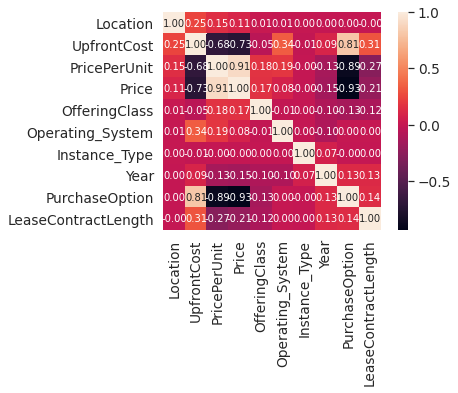

In [ ]:
k=10
corr = df1.corr()
corr
cols = corr.nlargest(k,'Location')['Operating_System'].index
cm = np.corrcoef(df1[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
# series = df1.isnull().sum().sort_values(ascending=False)
# for index, value in series.items() :
#     if value > (df1.shape[0] > 0) :
#         print(str(index) + " : " + str(value))

In [ ]:
# is_NaN = df1.isnull()
# row_has_NaN = is_NaN.any(axis=1)
# rows_with_NaN = df1[row_has_NaN]

# print(rows_with_NaN)

Empty DataFrame
Columns: [Instance_Type, Project_Type, Project_Size, vCPU, Memory, Network_Performance, Operating_System, Storage, Location, Clock_Speed, OfferingClass, LeaseContractLength, PurchaseOption]
Index: []


In [116]:
for col in df1.columns:
    print(col, ':  ', len(df2[col].unique()), ' labels')

PricePerUnit :   538  labels
UpfrontCost :   449  labels
Instance_Type :   52  labels
Operating_System :   4  labels
Location :   19  labels
LeaseContractLength :   2  labels
PurchaseOption :   3  labels
OfferingClass :   2  labels


In [ ]:
df5.Instance_Type.value_counts().sort_values(ascending=False).head(80)

In [ ]:
# # Get the count of each value
# value_counts = df1['Instance_Type'].value_counts()

# # Select the values where the count is less than 3 (or 5 if you like)
# to_remove = value_counts[value_counts >= 56000].index
# # Keep rows where the Instance_Type column is not in to_remove
# df1 = df1[~df1.Instance_Type.isin(to_remove)]
# df1

Int64Index([8], dtype='int64')

In [ ]:
df1['Instance_Type']

0         35
1         23
4         43
5         47
8         43
          ..
805686    54
805689    81
805690    66
805695    64
805698    80
Name: Instance_Type, Length: 253654, dtype: int64

In [120]:
df3 = df2.loc[df2['Instance_Type'] == 43].head(15000)
df4 = df2.loc[df2['Instance_Type'] != 43].head(200000)
df5 = df3.append([df4])

In [121]:
df5

,PricePerUnit,UpfrontCost,Instance_Type,Operating_System,Location,LeaseContractLength,PurchaseOption,OfferingClass
4,0.1200,5.03666,43,4,14,2,1,1
8,0.0800,1.65294,43,1,4,1,1,1
9,0.1190,3.68724,43,2,17,2,1,1
37,0.0880,1.81030,43,1,5,1,1,1
75,2.0692,0.00000,43,2,8,1,3,1
...,...,...,...,...,...,...,...,...
768360,1.1547,1.24280,48,2,6,1,2,2
768365,0.1190,4.18457,66,3,6,1,1,2
768368,1.8174,0.00000,48,2,5,1,3,1
768372,0.0800,3.19018,82,3,3,1,1,1


In [ ]:
df5.Instance_Type.value_counts().sort_values(ascending=False).head(10)

43    43946
64    12975
47     9184
68     6787
80     6784
54     6752
28     6699
76     6687
56     6505
38     6479
Name: Instance_Type, dtype: int64

In [ ]:
# df_frequency_map = df1.Instance_Type.value_counts().to_dict()
# df1.Instance_Type = df1.Instance_Type.map(df_frequency_map)
# df1.head(10)

In [ ]:
# top_10 = [x for x in df1.Instance_Type.value_counts().sort_values(ascending=False).head(10).index]
# top_10

[8, 9, 6, 3, 5, 4, 7, 1]

In [ ]:
# pd.get_dummies(df1, drop_first=True).shape

(253654, 6)

In [ ]:
# df1

In [141]:
from keras.models import Sequential 
from sklearn.linear_model import LogisticRegression
from keras.layers import Dense
from keras import regularizers
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from statistics import mean, stdev 
from sklearn import linear_model
import statsmodels.api as sm
import tkinter as tk 
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [ ]:
# sns.set(style="ticks", color_codes=True)
# ax = sns.pairplot(df1,palette="husl")
# plt.show()

In [ ]:
# X = df1.iloc[:,1:].values
# X

array([[35,  1, 16,  1,  1,  2],
       [23,  3, 19,  2,  2,  1],
       [43,  1, 13,  2,  3,  2],
       ...,
       [66,  4,  7,  2,  2,  2],
       [64,  3, 17,  1,  3,  1],
       [80,  3, 18,  2,  3,  2]])

In [ ]:
# df10 = df10.drop(columns=['Price', 'UpfrontCost'])

In [ ]:
# y = df1.iloc[:,0].values
# y = y.reshape((y.shape[0],1))
# y

array([1.654900e+02, 9.249000e+01, 2.390700e+02, ..., 1.745405e+06,
       1.757246e+06, 1.757246e+06])

In [142]:
X = df5.drop(columns=['PricePerUnit', 'UpfrontCost'])
y = df5[['PricePerUnit']]
X

,Instance_Type,Operating_System,Location,LeaseContractLength,PurchaseOption,OfferingClass
4,43,4,14,2,1,1
8,43,1,4,1,1,1
9,43,2,17,2,1,1
37,43,1,5,1,1,1
75,43,2,8,1,3,1
...,...,...,...,...,...,...
768360,48,2,6,1,2,2
768365,66,3,6,1,1,2
768368,48,2,5,1,3,1
768372,82,3,3,1,1,1


In [125]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [126]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 [-0.98717204]
Coefficients: 
 [[-1.76489622e-04  1.48104656e-01  2.08927636e-02 -2.41689566e-01
   9.16515988e-01  6.77848428e-02]]


In [127]:
# prediction with sklearn
New_Instance_Type = 1
# New_Project_Type = 2
# New_Project_Size = 2
# New_vCPU = 1
# New_Memory = 2
# New_Network_Performance = 2
New_Operating_System = 1
# New_Storage = 2
New_Location = 2
New_OfferingClass = 2
New_LeaseContractLength = 2
New_PurchaseOption = 2
print ('Predicted Stock Index Price: \n', regr.predict([[New_Instance_Type ,New_Operating_System, New_Location, New_LeaseContractLength, New_PurchaseOption, New_OfferingClass]]))

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Predicted Stock Index Price: 
 [[0.68776419]]
                            OLS Regression Results                            
Dep. Variable:           PricePerUnit   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                 2.399e+05
Date:                Sun, 13 Dec 2020   Prob (F-statistic):               0.00
Time:                        12:07:36   Log-Likelihood:                -35955.
No. Observations:              215000   AIC:                         7.192e+04
Df Residuals:                  214993   BIC:                         7.200e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [128]:
# Create StratifiedKFold object. 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) 
loss_and_metrics = [] 

Other Way

In [143]:
from sklearn.model_selection import cross_val_score
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost
classifier=xgboost.XGBClassifier()
import keras

In [ ]:
# score=cross_val_score(classifier,X,y,cv=10)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# score

array([0.81553861, 0.81294354, 0.81368499, 0.81432052, 0.81416164,
       0.81362216, 0.81664107, 0.81441661, 0.81155659, 0.8155818 ])

In [ ]:
# n_X = preprocessing.normalize(X)
# n_y = preprocessing.normalize(y)
# n_X

In [ ]:
# y_true = df1['Instance_Type'].values
# y_true

array([6, 6, 6, ..., 6, 8, 9])

In [144]:
training_X, testing_X, training_y, testing_y = train_test_split(X,y , test_size=0.20,random_state=1)
# training_X, testing_X, training_y, testing_y = train_test_split(training_X,training_y, stratify=training_y, test_size=0.20,random_state=1)

print('Training data: '+str(training_X.shape[0]))
print('Testing  data: '+str(testing_X.shape[0]))
print('Cross Validation data: '+ str(testing_y.shape[0]))

Training data: 172000
Testing  data: 43000
Cross Validation data: 43000


In [145]:
df5

,PricePerUnit,UpfrontCost,Instance_Type,Operating_System,Location,LeaseContractLength,PurchaseOption,OfferingClass
4,0.1200,5.03666,43,4,14,2,1,1
8,0.0800,1.65294,43,1,4,1,1,1
9,0.1190,3.68724,43,2,17,2,1,1
37,0.0880,1.81030,43,1,5,1,1,1
75,2.0692,0.00000,43,2,8,1,3,1
...,...,...,...,...,...,...,...,...
768360,1.1547,1.24280,48,2,6,1,2,2
768365,0.1190,4.18457,66,3,6,1,1,2
768368,1.8174,0.00000,48,2,5,1,3,1
768372,0.0800,3.19018,82,3,3,1,1,1


In [146]:
#_______________ Using Neural Net ___________
def baseline_model():
  print('Multi Layer Perceptron Deep Learning Model')
  model = keras.models.Sequential()

  model.add(keras.layers.Dense(6, input_dim=6, activation='relu'))
  model.add(keras.layers.Dense(6, activation='relu'))
  model.add(keras.layers.Dense(1))

  model.compile(optimizer='adam', loss='mean_squared_error')
  return model

In [ ]:
# X = np.asarray(X).astype(np.float32)

In [147]:
# evaluate model with standardized dataset
model = baseline_model()
model.fit(training_X, training_y, batch_size = 10, epochs = 30)

Multi Layer Perceptron Deep Learning Model
Epoch 1/30
17200/17200 [==============================] - 16s 937us/step - loss: 0.1771 - accuracy: 0.0000e+00
Epoch 2/30
17200/17200 [==============================] - 16s 926us/step - loss: 0.0873 - accuracy: 0.0000e+00
Epoch 3/30
17200/17200 [==============================] - 16s 932us/step - loss: 0.0514 - accuracy: 0.0000e+00
Epoch 4/30
17200/17200 [==============================] - 16s 923us/step - loss: 0.0278 - accuracy: 0.0000e+00
Epoch 5/30
17200/17200 [==============================] - 15s 878us/step - loss: 0.0272 - accuracy: 0.0000e+00
Epoch 6/30
17200/17200 [==============================] - 16s 955us/step - loss: 0.0265 - accuracy: 0.0000e+00
Epoch 7/30
17200/17200 [==============================] - 17s 999us/step - loss: 0.0260 - accuracy: 0.0000e+00
Epoch 8/30
17200/17200 [==============================] - 16s 920us/step - loss: 0.0255 - accuracy: 0.0000e+00
Epoch 9/30
17200/17200 [==============================] - 17s 960us/s

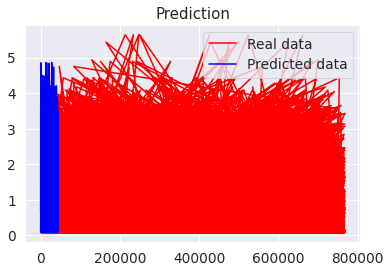

In [148]:
y_pred = model.predict(testing_X)

plt.plot(testing_y, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [149]:
X

,Instance_Type,Operating_System,Location,LeaseContractLength,PurchaseOption,OfferingClass
4,43,4,14,2,1,1
8,43,1,4,1,1,1
9,43,2,17,2,1,1
37,43,1,5,1,1,1
75,43,2,8,1,3,1
...,...,...,...,...,...,...
768360,48,2,6,1,2,2
768365,66,3,6,1,1,2
768368,48,2,5,1,3,1
768372,82,3,3,1,1,1


In [151]:
test_data = np.array([10,	1,	10,	2,	1, 2])
print(model.predict(test_data.reshape(1,6), batch_size=1))

[[0.10141832]]


In [152]:
# fit model
history = model.fit(training_X, training_y, validation_data=(testing_X, testing_y), epochs=10)

loss_and_metrics = model.evaluate(testing_X,testing_y)

print(loss_and_metrics)

Epoch 1/10
5375/5375 [==============================] - 8s 1ms/step - loss: 0.0151 - accuracy: 0.0000e+00 - val_loss: 0.0150 - val_accuracy: 0.0000e+00
Epoch 2/10
5375/5375 [==============================] - 8s 1ms/step - loss: 0.0152 - accuracy: 0.0000e+00 - val_loss: 0.0142 - val_accuracy: 0.0000e+00
Epoch 3/10
5375/5375 [==============================] - 8s 1ms/step - loss: 0.0151 - accuracy: 0.0000e+00 - val_loss: 0.0157 - val_accuracy: 0.0000e+00
Epoch 4/10
5375/5375 [==============================] - 8s 1ms/step - loss: 0.0152 - accuracy: 0.0000e+00 - val_loss: 0.0138 - val_accuracy: 0.0000e+00
Epoch 5/10
5375/5375 [==============================] - 8s 1ms/step - loss: 0.0151 - accuracy: 0.0000e+00 - val_loss: 0.0181 - val_accuracy: 0.0000e+00
Epoch 6/10
5375/5375 [==============================] - 8s 1ms/step - loss: 0.0151 - accuracy: 0.0000e+00 - val_loss: 0.0137 - val_accuracy: 0.0000e+00
Epoch 7/10
5375/5375 [==============================] - 8s 1ms/step - loss: 0.0149 - acc

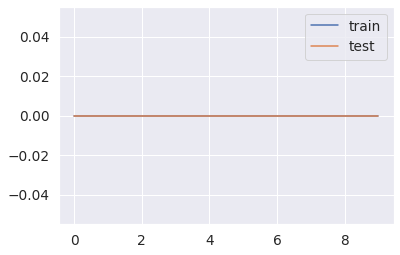

In [153]:
# plot history
# summarize history for accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

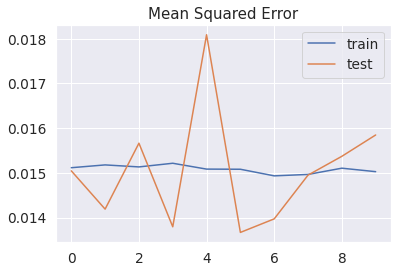

In [154]:
# plot loss during training
plt.title('Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()